
# Project_1
## Name: Brian KYANJO
### Class: ME 571
#### Date: Febraury, 18th 2021

In [62]:
%matplotlib notebook
%pylab
import pandas as pd

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


# Task 1

#### 1. Run a strong scaling experiment using nproc=1,2,4,8,16,32,64 and problem size $N = 2^{28}$. In your write-up, show the speedup and efficiency plots. Comment on what is happening. How does the parallel efficiency change with the number of processes?

In [68]:
#strong scaling

#import task1 data 
task1_strong = pd.read_csv('task1_strong.csv')
# number of processors
np=array(task1_strong['nproc'])

#serial time
T1 = array(task1_strong['elapsed_time'][0])

#parallel time
Tp = array(task1_strong['elapsed_time'])

#speed up
s = T1/Tp

#efficiency plot
eff = s/np

#ideal curve
e = s/s

<IPython.core.display.Javascript object>


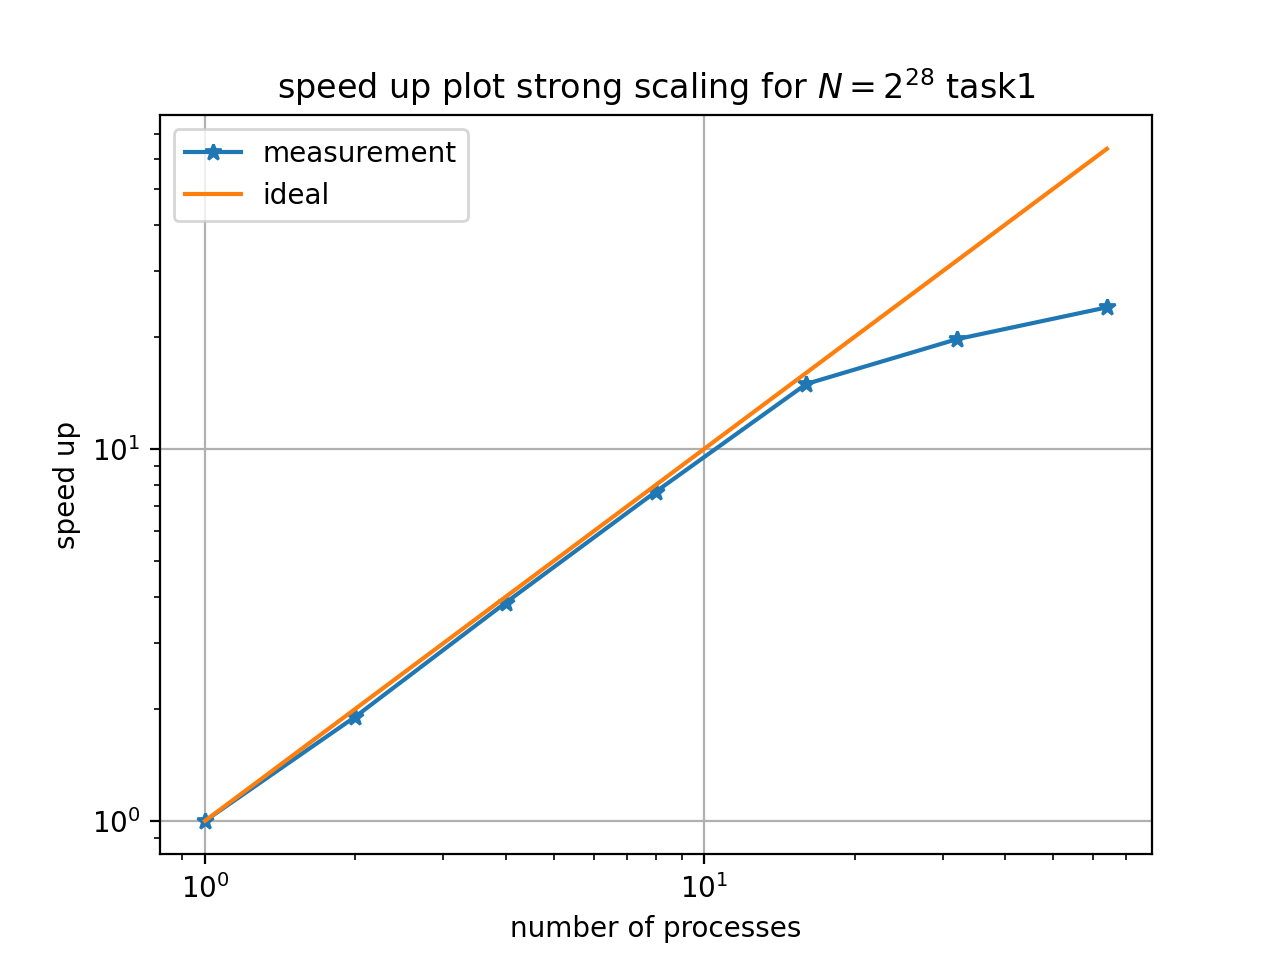

<IPython.core.display.Javascript object>


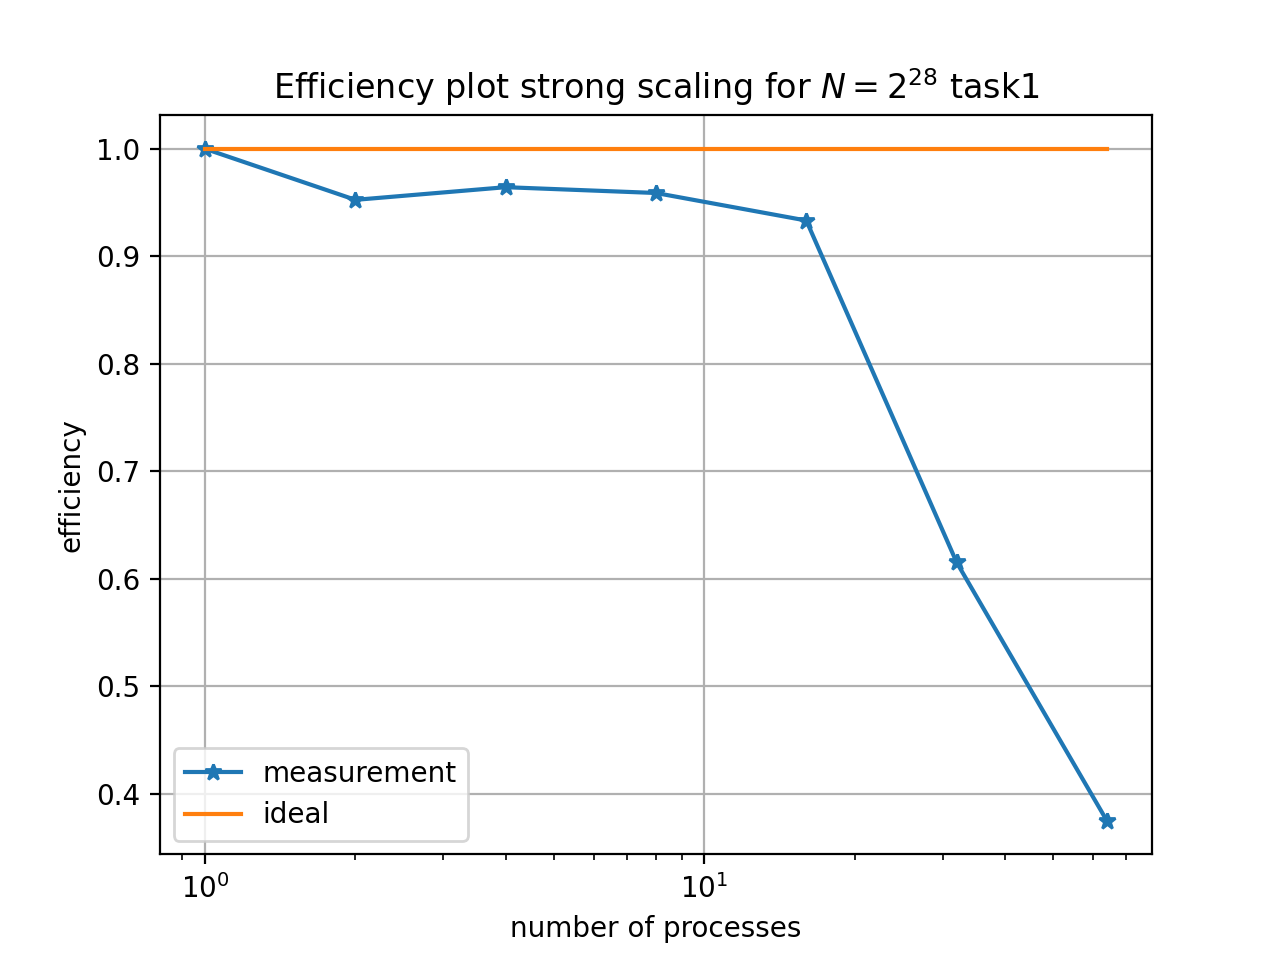

In [69]:
figure(1)
loglog(np,s,"-*",label='measurement')
loglog(np,np,label='ideal')
ylabel("speed up")
grid()
xlabel("number of processes")
title("speed up plot strong scaling for $N=2^{28}$ task1")
legend()
figure(2)
semilogx(np,eff,"-*",label='measurement')
semilogx(np,e,label='ideal')
title("Efficiency plot strong scaling for $N=2^{28}$ task1")
ylabel("efficiency")
xlabel("number of processes")
grid()
legend()
show()

In figure 1, we obtain a linear speedup as the number of processors increases, up to 16 processors, when the speedup attains a typical sucess. This means, that the process is perfectly strongly scaled for a given number of processors, as the number grows big, scalability in turns of speedup drops, this is because the serial part of the code determines the upper limit of speedup. Below 16 processors, every processor is contributing to 100% of there computational power.

In figure 2, Parallel efficiency decrease with increase in number of processors,  This is because according to Amdahl's law as the number of processors increases, with a fixed problem size, and running the program on a single processor(serial time), since some part of the code where not  parallelized, the time take by the parallelized fraction of the code, for what ever number of processors used, cannot be less than the execution time by the serial part, hence as the processes increases, parallel efficiency decreases up to below 40%.

#### 2. Run a weak scaling experiment using the same number of processors, starting with nproc=1 and $N = 2^{22}$ and doubling the problem size each time you double the number of processes. In your write-up show the weak scaling efficiency plot and comment on it.

In [72]:
#import task1 data 
task1_weak = pd.read_csv('task1_weak.csv')
# number of processors
np=array(task1_weak['nproc'])

#serial time
Tw1 = array(task1_weak['elapsed_time'][0])

#parallel time
Twp = array(task1_weak['elapsed_time'])

#speed up
sw = Tw1/Twp

sw1 = np*Tw1/Twp

#efficiency plot
effw = sw1/np

e = sw/sw

<IPython.core.display.Javascript object>


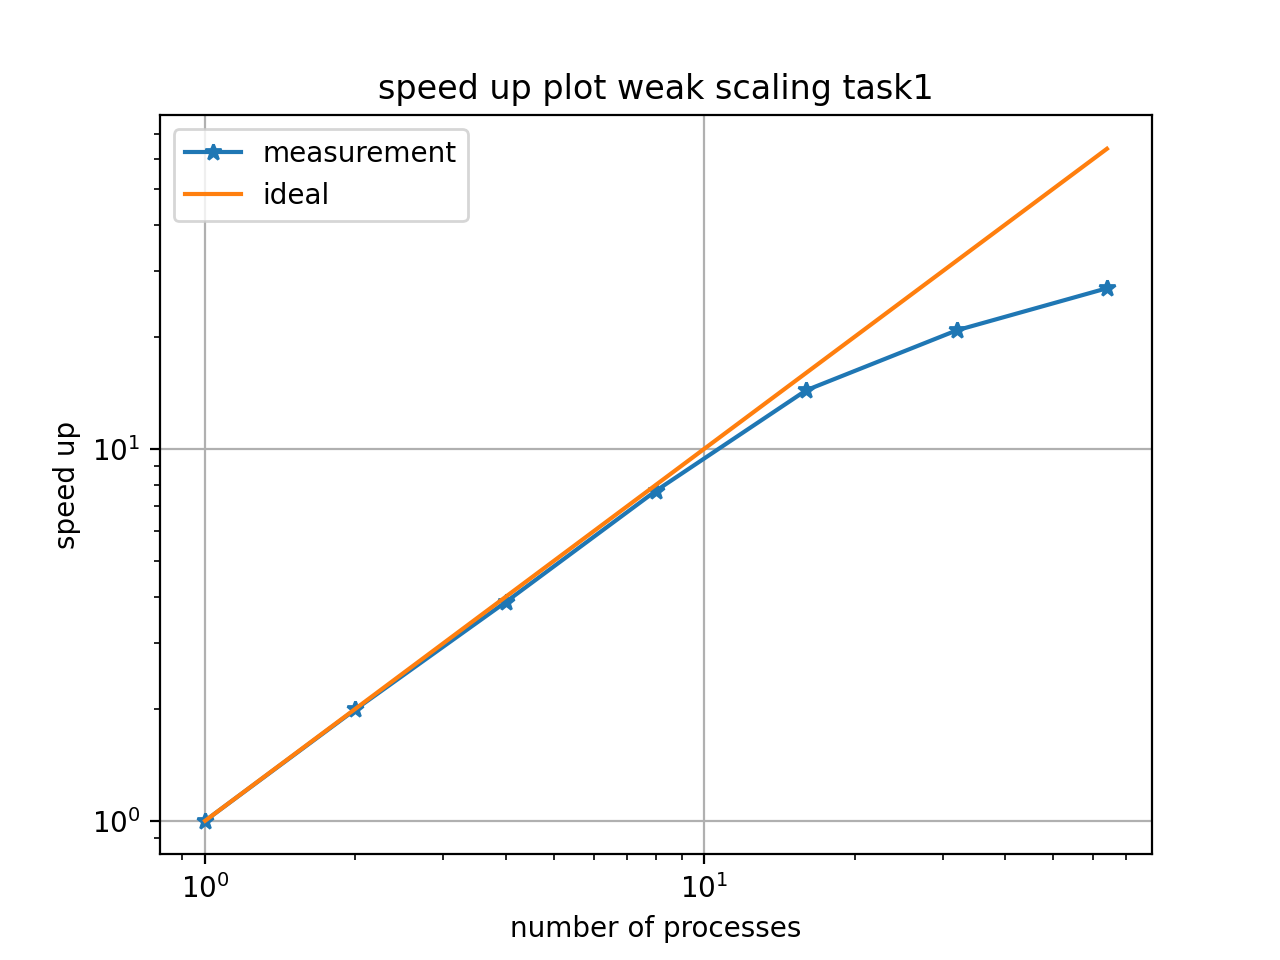

<IPython.core.display.Javascript object>


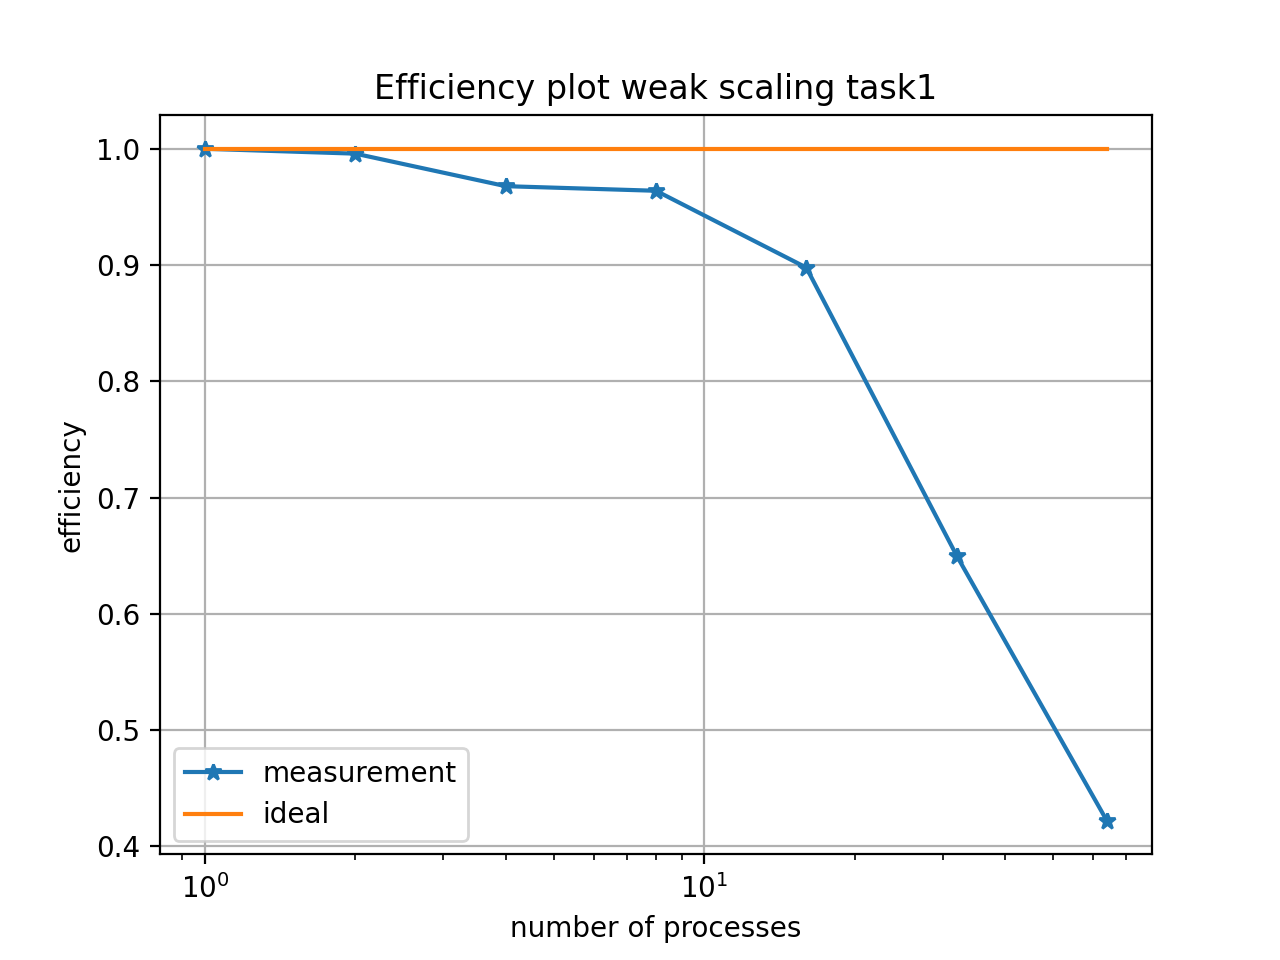

In [73]:
figure(3)
loglog(np,sw1,"-*",label='measurement')
loglog(np,np,label='ideal')
ylabel("speed up")
xlabel("number of processes")
legend()
grid()
title("speed up plot weak scaling task1")
figure(4)
semilogx(np,effw,"-*",label='measurement')
semilogx(np,e,label='ideal')
title("Efficiency plot weak scaling task1")
ylabel("efficiency")
xlabel("number of processes")
grid()
legend()
show()

In figure 3, as the problem size doubles with increasing number of processors, speedup scales linearly up to 8 processors and then attains a typical sucess, this means that the code is perfectly scaled up to 8 processors and therefore according to Gustafson's law, this scaled speedup has no upperlimit. The remaining number of processors:16, 32, and 64, attain a typical sucess.

In figure 4, as the problem size doubles with increasing number of processors, for the first 4 processors, the code is 100% parallel efficient, and then drops gradually to below 50%, as the number of resources increases with doubling problem size. This is because its only the parallel fraction of the code that scales linaerly with the number of processors, and the serial fraction doesnot depend of the problem size as depicted from figure 3 above for the scaled speedup.

# Task 2

In [74]:
#exact value
sigma_exact = 1/sqrt(12)
print('Exact value:', sigma_exact,'\n')

#import task1 data 
task1 = pd.read_csv('task1_strong.csv')
sigma_1 = task1['sigma_1'][0]
print('sigma obtained from task1:', sigma_1,'\n')

#import task2 data 
task2 = pd.read_csv('task2.csv')
print('sigma obtained from task2:',task2['sigma_2'][0])

Exact value: 0.2886751345948129 

sigma obtained from task1: 0.2886671 

sigma obtained from task2: 0.289


 The serial code gives the same results for standard deviation as in task 1, compared to the result displayed above.

# Task 3

#### 3. Create strong scaling experiment using nproc=1,2,4,8,16,32,64 and problem size $N = 2^{28}.$ In your write-up, show the speedup and efficiency plots and comment on how they compare to strong scaling in Task 1.

In [75]:
#import task3 data 
task3_strong = pd.read_csv('task3_strong.csv')
# number of processors
np=array(task3_strong['nproc'])

#serial time
T1 = array(task3_strong['elapsed_time'][0])

#parallel time
Tp = array(task3_strong['elapsed_time'])

#speed up
s = T1/Tp

#efficiency plot
eff = s/np

#ideal curve
e = s/s

<IPython.core.display.Javascript object>


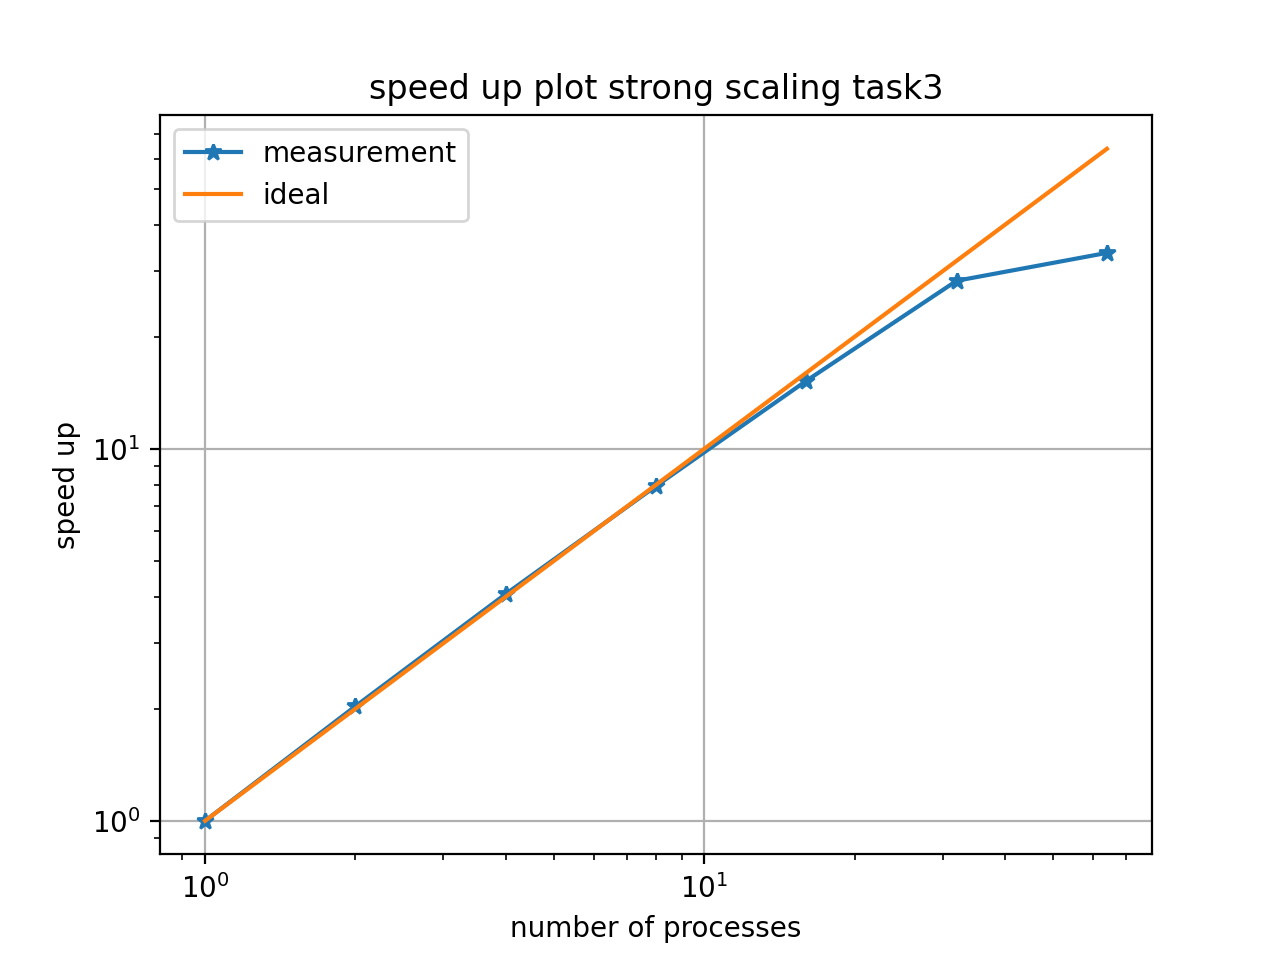

<IPython.core.display.Javascript object>


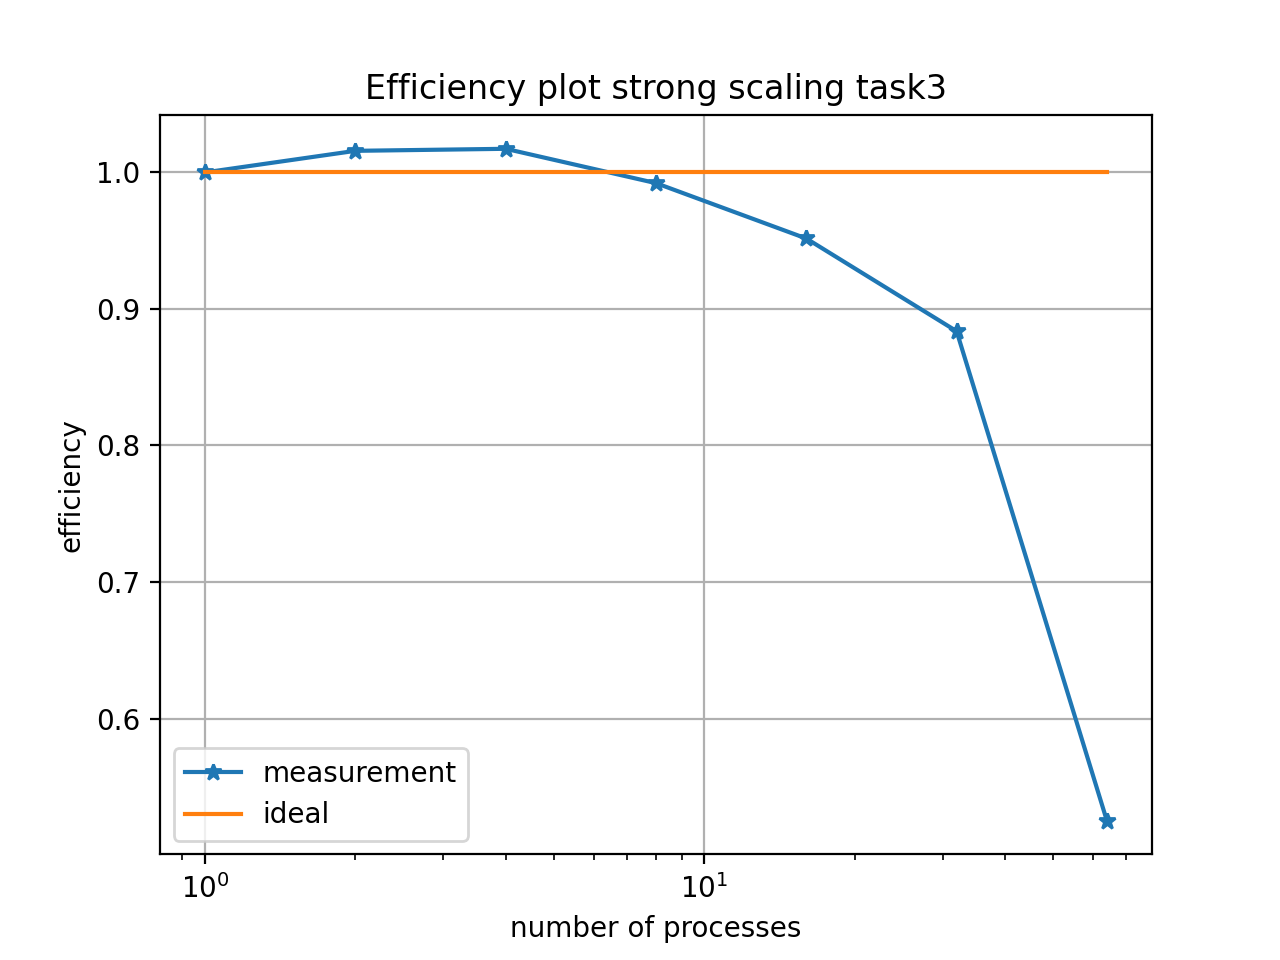

In [76]:
figure(5)
loglog(np,s,"-*",label='measurement')
loglog(np,np,label='ideal')
legend()
grid()
ylabel("speed up")
xlabel("number of processes")
title("speed up plot strong scaling task3")
figure(6)
semilogx(np,eff,"-*",label='measurement')
semilogx(np,e,label='ideal')
title("Efficiency plot strong scaling task3")
ylabel("efficiency")
legend()
grid()
xlabel("number of processes")
show()

In figure 5, as the resources increase with fixed problem size, the algorithm speedup is linearly scaled up to 32 processes, and then attains typical sucess for the last 64 processors. This implies that the upper limit for the scaled speedup is attained at 32 processes, and that's when each process is contributing 100% of its computational power.

In figure 6, as the number of processors increase with fixed problem size, parallel efficiency exceeds 100%, for the first resourses, this is due to minimized load imbalance and overhead, and maximized concurency. After that as the  number of processors and problem size doubles, parallel efficiency drops gradually but still good.

However the algoritm performs scales better than Task1, according to efficiency and speedup plots, because, the efficeincy in task3, starts from 100%, shoots up then drops, but doesnt reduce to below 50%, unlike task1 which doesnt hit 100% but drops gradually to below 40% which is a huge difference in terms of perormance.


#### 4. Run a weak scaling experiment using the same number of processors, starting with nproc=1 and $N = 2^{22}$ and doubling the problem size each time you double the number of processes. In your write-up show the weak scaling efficiency plot and comment on how it compares to weak scaling in Task 1.


In [77]:
#import task3 data 
task3_weak = pd.read_csv('task3_weak.csv')
# number of processors
np=array(task3_weak['nproc'])

#serial time
T1 = array(task3_weak['elapsed_time'][0])

#parallel time
Tp = array(task3_weak['elapsed_time'])

#speed up
s = T1/Tp
sw = np*s

#efficiency plot
eff = sw/np

#ideal curve
e = s/s

<IPython.core.display.Javascript object>


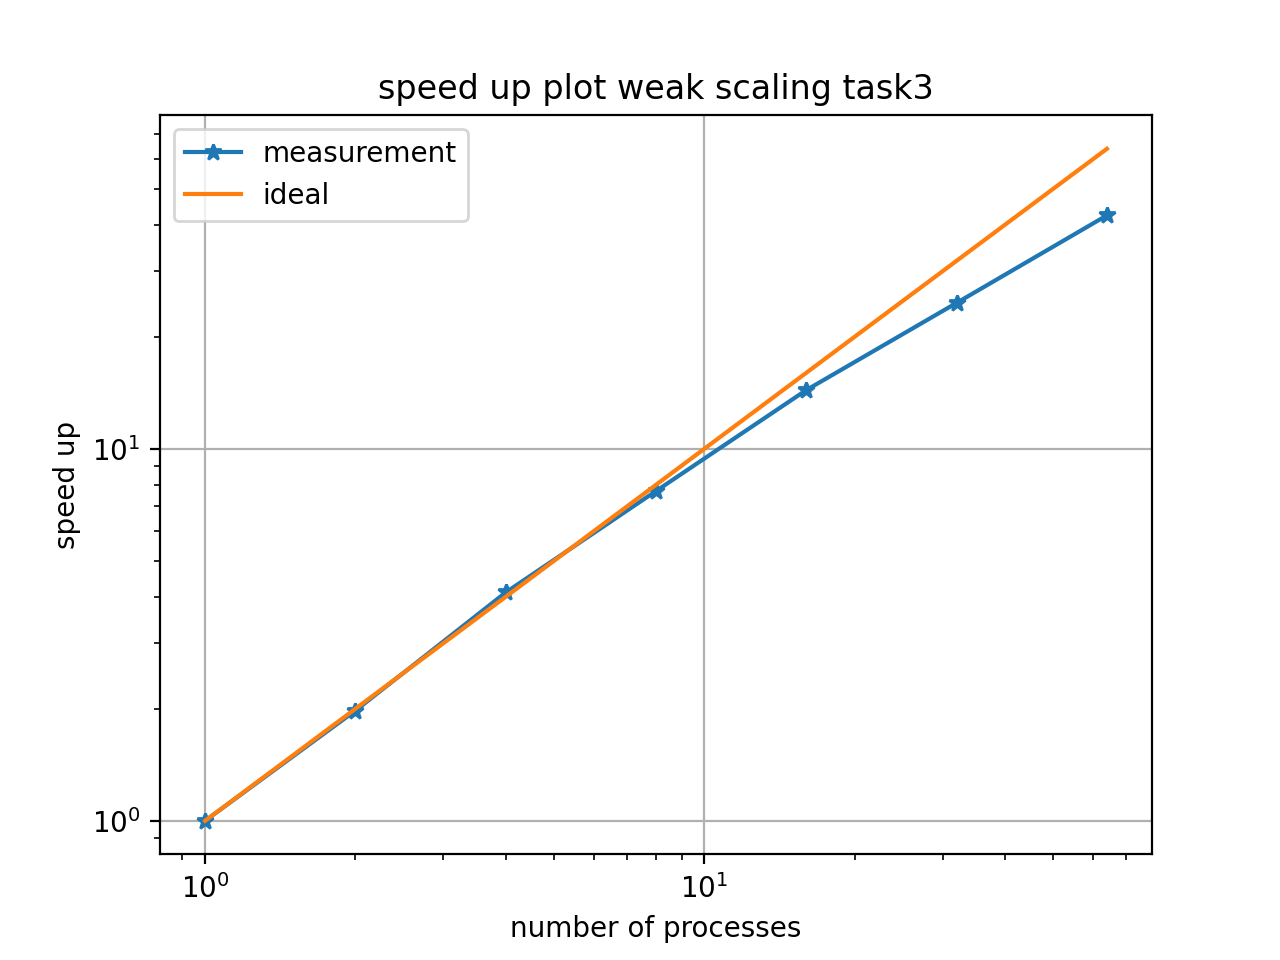

<IPython.core.display.Javascript object>


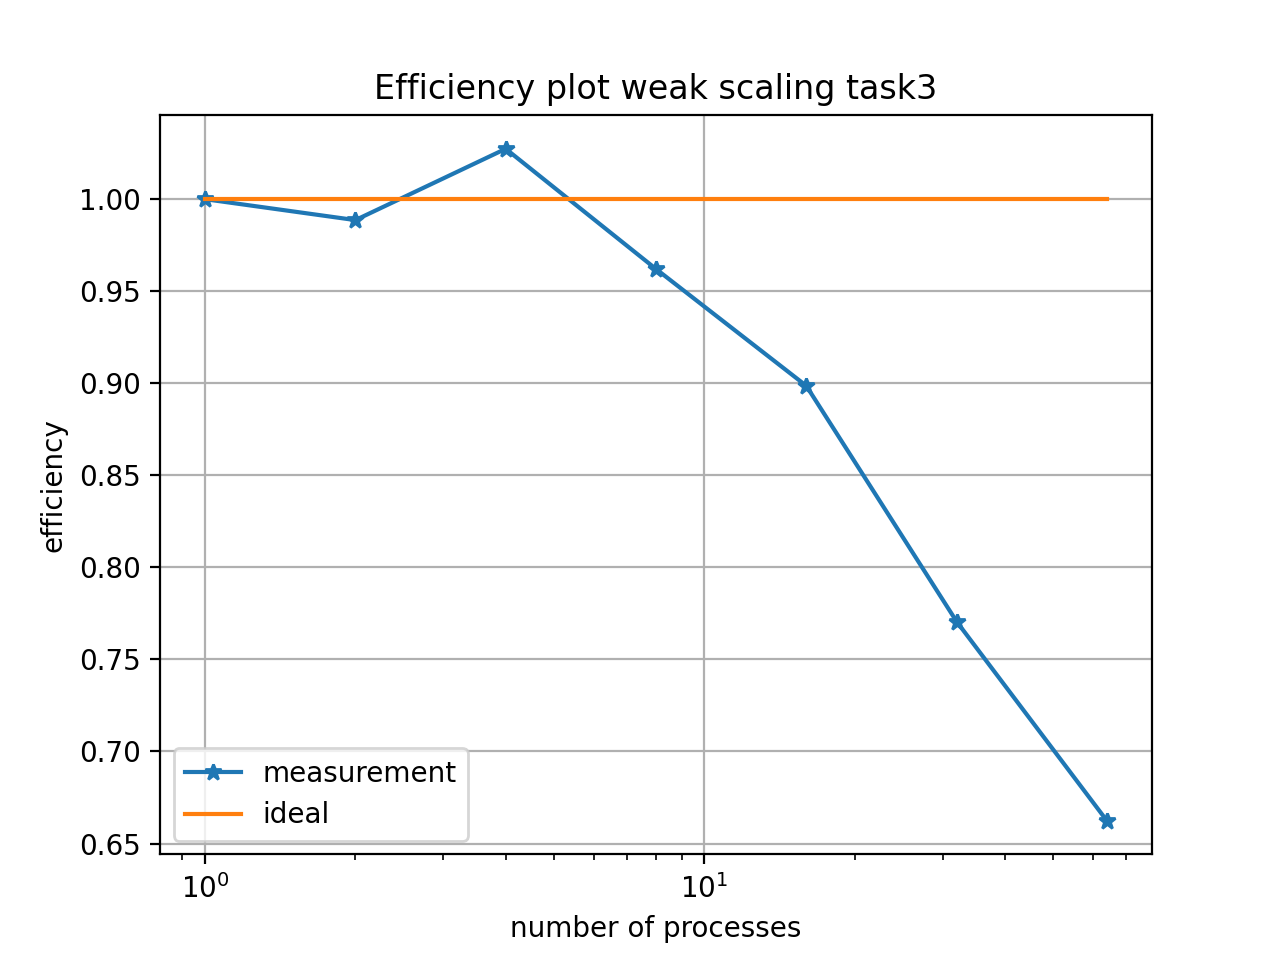

In [78]:
figure(7)
loglog(np,sw,"-*",label='measurement')
loglog(np,np,label='ideal')
legend()
ylabel("speed up")
xlabel("number of processes")
grid()
title("speed up plot weak scaling task3")
figure(8)
semilogx(np,eff,"-*",label='measurement')
semilogx(np,e,label='ideal')
title("Efficiency plot weak scaling task3")
ylabel("efficiency")
xlabel("number of processes")
legend()
grid()
show()

In figure 7, speed up scales linearly with increasing number of processors as problem size doubles, this varifies Gustafson's law, hence the algorithm is perfectly scaled. compared to Task1 in which linearity drops at large number of processors.

In figure 8, parallel efficiency drops linaerly with increasing number of processors, as the problem size doubles. This implies that this program has been made cost optimal, hence the system sustained efficiency, good enough that it didn't drop 65% hence good efficiency satisfying Gustafson's law.

However, compared to weak speed up and efficiency plots in Task1, there is a huge difference in scalability. Therefore the algorithm performs better than task1 for weak scaling through out the runs. As even efficiency, in Task3, shoots up above 100%, then drops uniformly to between 65-70%, which is way better than 40-45% for task1.

# Mastery

#### Time the computation and communication time for both algorithms separately. Compare them in one plot. What conclusions can you draw from the plot?

In [81]:
# number of processors
np=array(task3_weak['nproc'])

#import task1 data 
task1_strong = pd.read_csv('task1_strong.csv')
task1_weak = pd.read_csv('task1_weak.csv')

#import task3 data 
task3_strong = pd.read_csv('task3_strong.csv')
task3_weak = pd.read_csv('task3_weak.csv')

#task1_strong
time_comput_task1_s = array(task1_strong['time_comput'])
time_comm_task1_s = array(task1_strong['time_comm'])

#task1_weak
time_comput_task1_w = array(task1_weak['time_comput'])
time_comm_task1_w = array(task1_weak['time_comm'])

#task3_strong
time_comput_task3_s = array(task3_strong['time_comput'])
time_comm_task3_s = array(task3_strong['time_comm'])


#task3_weak
time_comput_task3_w = array(task3_weak['time_comput'])
time_comm_task3_w = array(task3_weak['time_comm'])       

<IPython.core.display.Javascript object>


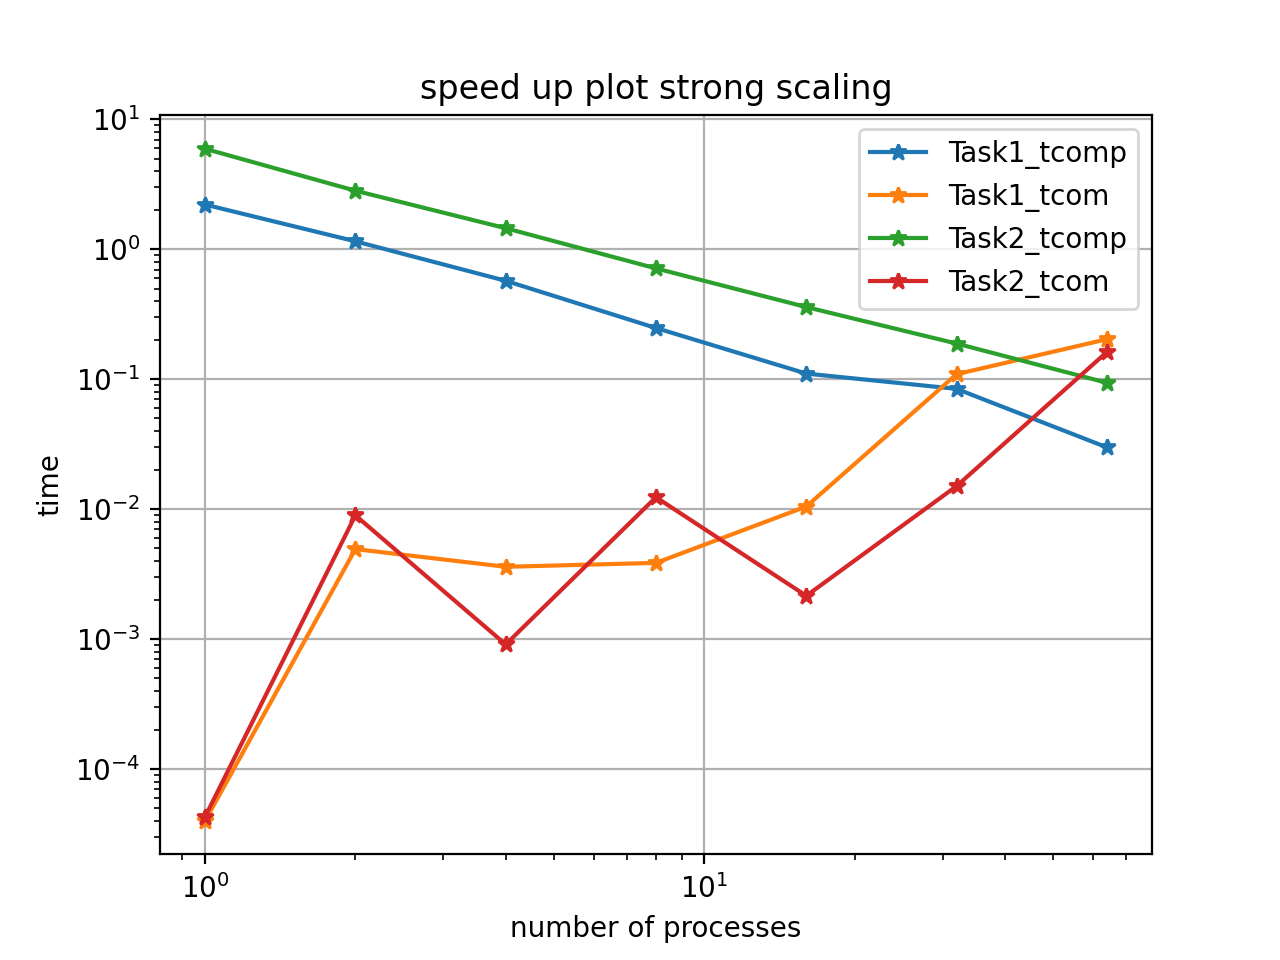

<IPython.core.display.Javascript object>


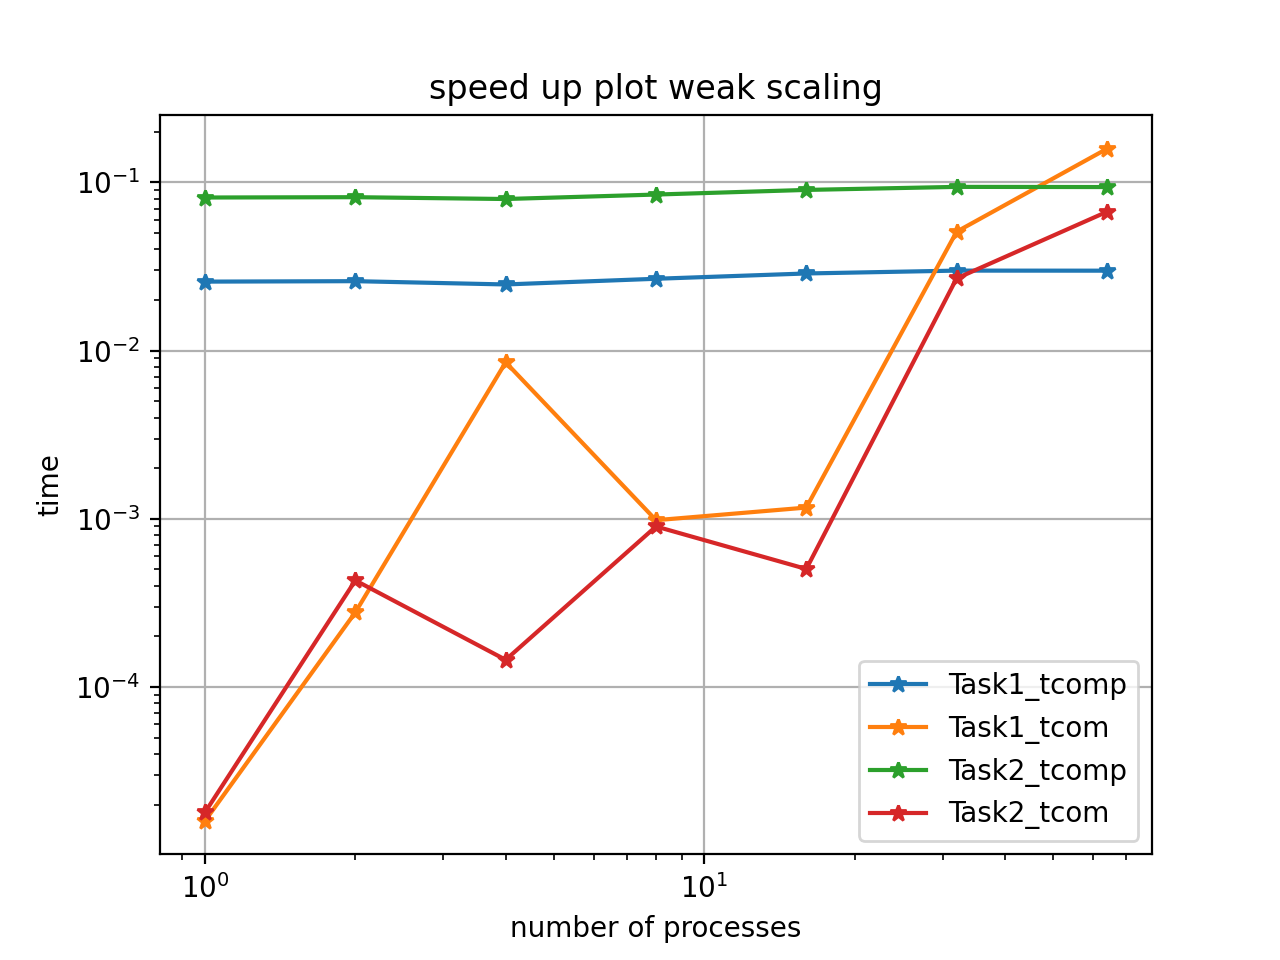

In [82]:
figure(9)
loglog(np,time_comput_task1_s,"-*",label='Task1_tcomp')
loglog(np,time_comm_task1_s,"-*",label='Task1_tcom')
loglog(np,time_comput_task3_s,"-*",label='Task2_tcomp')
loglog(np,time_comm_task3_s,"-*",label='Task2_tcom')
legend()
ylabel("time")
xlabel("number of processes")
grid()
title("speed up plot strong scaling")
figure(10)
loglog(np,time_comput_task1_w,"-*",label='Task1_tcomp')
loglog(np,time_comm_task1_w,"-*",label='Task1_tcom')
loglog(np,time_comput_task3_w,"-*",label='Task2_tcomp')
loglog(np,time_comm_task3_w,"-*",label='Task2_tcom')
legend()
ylabel("time")
xlabel("number of processes")
grid()
title("speed up plot weak scaling")
show()

In Figure 9, strong scaling, the computation time for the two tasks decreases linearly with the inceases in number of processors, however, more time is spent on computation in task2 more than task1, but they are linearly following the same decreasing trend. This is due to the for loops used to form Xglobal and Mglobal in the algorithm.

The Communication time for task2 increases as the number of processors increases, as more chunks of data is sent to different processors at the time. Overall less time is spent on communication for task2 compared to task1, as seen fro the graph above, and this is due to fact that MPI_Gather and MPI_Reduce take less communication time than broadcasting, allreduce and reduce used in Task1, as the number of processors increase on a fixed problem size. 

In Figure 10, weak scaling, the computation time for the two tasks is independent of the number of processors (is constant), even though, again Task2 uses more computational time than task1. This is due to the for loops used to form X and M in the algorithm. 

As the problem size doubles with increasing number of processors, the communication time for Task2 keeps on increasing as the same as for Task1, this is because more time is spent on communicating to different processors, as the problem size doubles at the same time increasing the number of processors, however, overall, Task2 spends less time on communication than Task1 as depicted from the graph above. 


#### If the scaling plots in Task 3 do not look much different from Task 1, try a significantly smaller (or significantly larger) problem size to see whether the problem size affects the strong and weak parallel efficiency.

Plots in Task 3 look much different from plots in Task 1.